# PyCIEMSS sample interface with different ODE solvers

### Load dependencies and interfaces

In [1]:
import os
import pyciemss
import pyciemss.visuals.plots as plots
import time

smoke_test = "CI" in os.environ

### Select model

In [2]:
MODEL_PATH = "https://raw.githubusercontent.com/DARPA-ASKEM/simulation-integration/main/data/models/"
model_opt1 = os.path.join(MODEL_PATH, "SIR_stockflow.json")
model_opt2 = os.path.join(MODEL_PATH, "SEIRHD_NPI_Type1_petrinet.json")

### Set parameters for sampling

In [3]:
start_time = 0.0
end_time = 40.0
logging_step_size = 1.0
num_samples = 3 if smoke_test else 100

## Baseline samples before optimization from model 1

,timepoint_id,sample_id,timepoint_unknown,persistent_p_cbeta_param,persistent_p_tr_param,I_state,R_state,S_state
0,0,0,1.0,0.361320,18.023865,1.357174,0.064888,999.577881
1,1,0,2.0,0.361320,18.023865,1.841593,0.152944,999.005432
2,2,0,3.0,0.361320,18.023865,2.498314,0.272415,998.229309
3,3,0,4.0,0.361320,18.023865,3.388113,0.434464,997.177612
4,4,0,5.0,0.361320,18.023865,4.592789,0.654180,995.753113
...,...,...,...,...,...,...,...,...
3895,34,99,35.0,0.386109,14.880690,403.469849,556.541138,40.989220
3896,35,99,36.0,0.386109,14.880690,382.818604,582.960205,35.222069
3897,36,99,37.0,0.386109,14.880690,362.493317,608.000366,30.506607
3898,37,99,38.0,0.386109,14.880690,342.681030,631.690979,26.627947


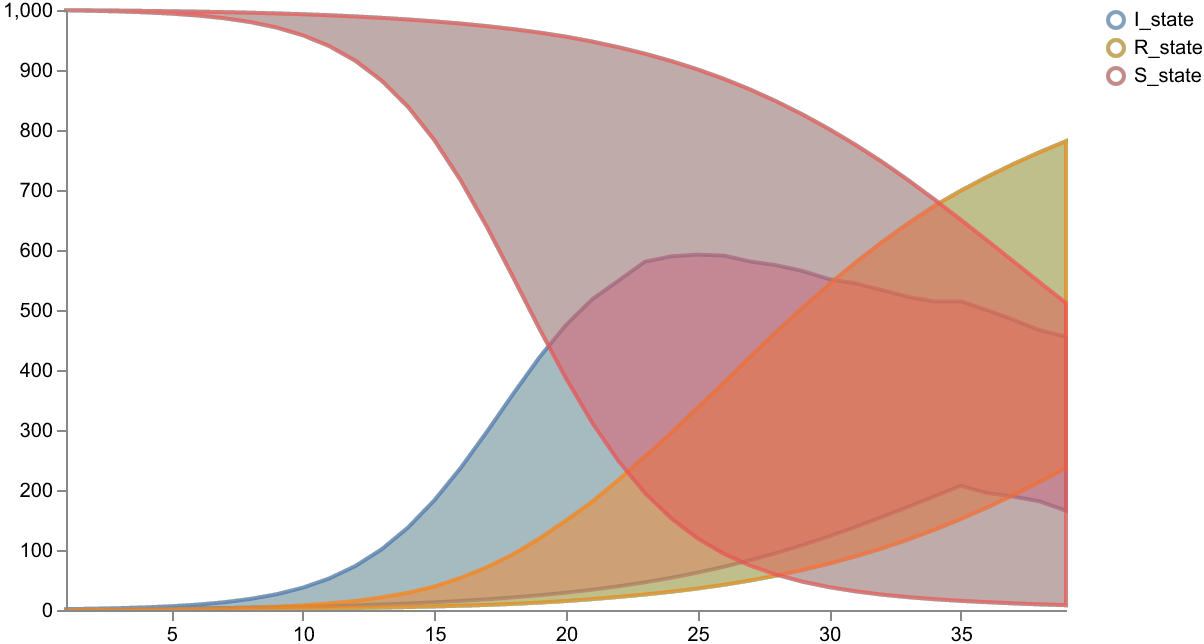

In [31]:
sample_results1 = pyciemss.sample(
    model_opt1, end_time, logging_step_size, num_samples, start_time=start_time
)
display(sample_results1["data"])
# Plot results for all states
schema = plots.trajectories(sample_results1["data"], keep=".*_state")
plots.ipy_display(schema, dpi=150)

## Baseline samples before optimization from model 2 using different ODE solvers

### Euler with step size 0.1

Time taken:  607.3961396217346


,timepoint_id,sample_id,timepoint_unknown,persistent_beta_c_param,persistent_kappa_param,persistent_gamma_param,persistent_hosp_param,persistent_death_hosp_param,persistent_I0_param,D_state,E_state,H_state,I_state,R_state,S_state,infected_observable_state,exposed_observable_state,hospitalized_observable_state,dead_observable_state
0,0,0,1.0,0.668704,0.158781,0.274357,0.163208,0.051129,7.758694,0.002160,32.720383,0.452328,13.761753,2.575828,19339992.0,13.761753,32.720383,0.452328,0.002160
1,1,0,2.0,0.668704,0.158781,0.274357,0.163208,0.051129,7.758694,0.009575,27.677650,1.004081,17.006048,6.285900,19339992.0,17.006048,27.677650,1.004081,0.009575
2,2,0,3.0,0.668704,0.158781,0.274357,0.163208,0.051129,7.758694,0.022660,24.072023,1.548972,18.544676,10.634673,19339992.0,18.544676,24.072023,1.548972,0.022660
3,3,0,4.0,0.668704,0.158781,0.274357,0.163208,0.051129,7.758694,0.041040,21.397835,2.033913,19.039265,15.305311,19339992.0,19.039265,21.397835,2.033913,0.041040
4,4,0,5.0,0.668704,0.158781,0.274357,0.163208,0.051129,7.758694,0.063970,19.334946,2.436742,18.904806,20.095562,19339992.0,18.904806,19.334946,2.436742,0.063970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,34,99,35.0,0.104697,0.569812,0.322141,0.028560,0.016251,14.508410,0.529754,852.500061,16.112164,513.282043,1688.910889,19339986.0,513.282043,852.500061,16.112164,0.529754
3896,35,99,36.0,0.104697,0.569812,0.322141,0.028560,0.016251,14.508410,0.584634,935.655579,17.683983,563.349182,1860.565063,19339986.0,563.349182,935.655579,17.683983,0.584634
3897,36,99,37.0,0.104697,0.569812,0.322141,0.028560,0.016251,14.508410,0.644869,1026.921875,19.409084,618.299988,2048.962646,19339986.0,618.299988,1026.921875,19.409084,0.644869
3898,37,99,38.0,0.104697,0.569812,0.322141,0.028560,0.016251,14.508410,0.710979,1127.091064,21.302437,678.610901,2255.737305,19339986.0,678.610901,1127.091064,21.302437,0.710979


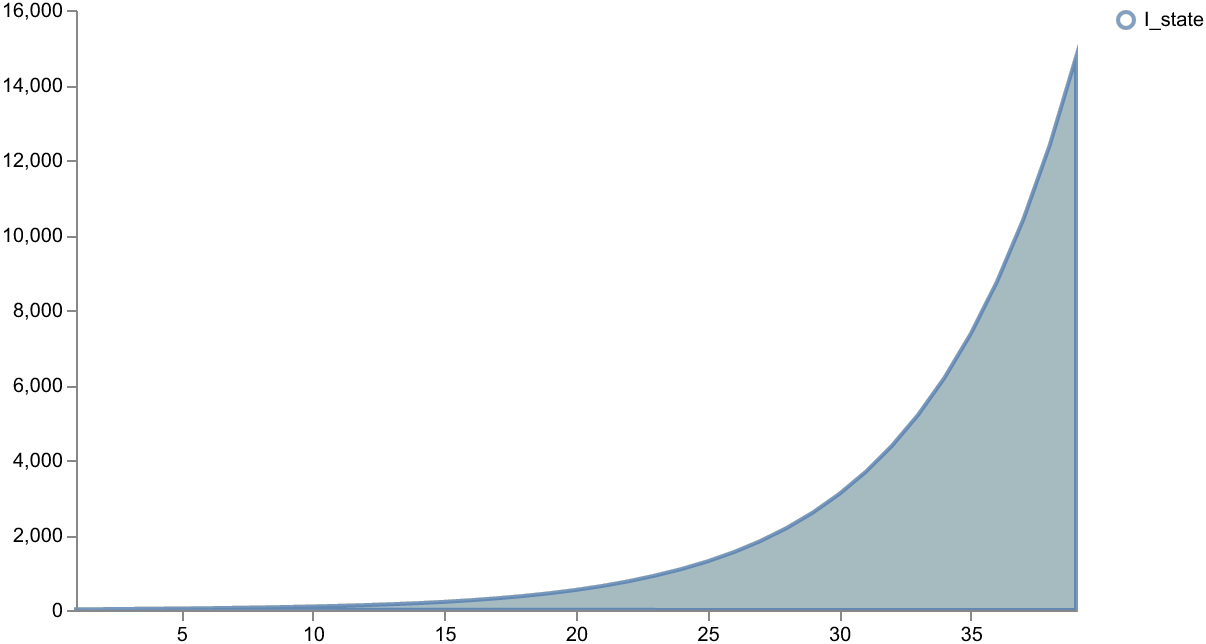

In [ ]:
start_t = time.time()
sample_results2 = pyciemss.sample(
    model_opt2,
    end_time,
    logging_step_size,
    num_samples,
    start_time=start_time,
    solver_method="euler",
    solver_options={"step_size": 0.1}
)
print("Time taken: ", time.time()-start_t)
display(sample_results2["data"])
# Plot results for all states
schema = plots.trajectories(sample_results2["data"], keep="I_state")
plots.ipy_display(schema, dpi=150)

### Euler with step size 0.001

Time taken:  607.3961396217346


,timepoint_id,sample_id,timepoint_unknown,persistent_beta_c_param,persistent_kappa_param,persistent_gamma_param,persistent_hosp_param,persistent_death_hosp_param,persistent_I0_param,D_state,E_state,H_state,I_state,R_state,S_state,infected_observable_state,exposed_observable_state,hospitalized_observable_state,dead_observable_state
0,0,0,1.0,0.668704,0.158781,0.274357,0.163208,0.051129,7.758694,0.002160,32.720383,0.452328,13.761753,2.575828,19339992.0,13.761753,32.720383,0.452328,0.002160
1,1,0,2.0,0.668704,0.158781,0.274357,0.163208,0.051129,7.758694,0.009575,27.677650,1.004081,17.006048,6.285900,19339992.0,17.006048,27.677650,1.004081,0.009575
2,2,0,3.0,0.668704,0.158781,0.274357,0.163208,0.051129,7.758694,0.022660,24.072023,1.548972,18.544676,10.634673,19339992.0,18.544676,24.072023,1.548972,0.022660
3,3,0,4.0,0.668704,0.158781,0.274357,0.163208,0.051129,7.758694,0.041040,21.397835,2.033913,19.039265,15.305311,19339992.0,19.039265,21.397835,2.033913,0.041040
4,4,0,5.0,0.668704,0.158781,0.274357,0.163208,0.051129,7.758694,0.063970,19.334946,2.436742,18.904806,20.095562,19339992.0,18.904806,19.334946,2.436742,0.063970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,34,99,35.0,0.104697,0.569812,0.322141,0.028560,0.016251,14.508410,0.529754,852.500061,16.112164,513.282043,1688.910889,19339986.0,513.282043,852.500061,16.112164,0.529754
3896,35,99,36.0,0.104697,0.569812,0.322141,0.028560,0.016251,14.508410,0.584634,935.655579,17.683983,563.349182,1860.565063,19339986.0,563.349182,935.655579,17.683983,0.584634
3897,36,99,37.0,0.104697,0.569812,0.322141,0.028560,0.016251,14.508410,0.644869,1026.921875,19.409084,618.299988,2048.962646,19339986.0,618.299988,1026.921875,19.409084,0.644869
3898,37,99,38.0,0.104697,0.569812,0.322141,0.028560,0.016251,14.508410,0.710979,1127.091064,21.302437,678.610901,2255.737305,19339986.0,678.610901,1127.091064,21.302437,0.710979


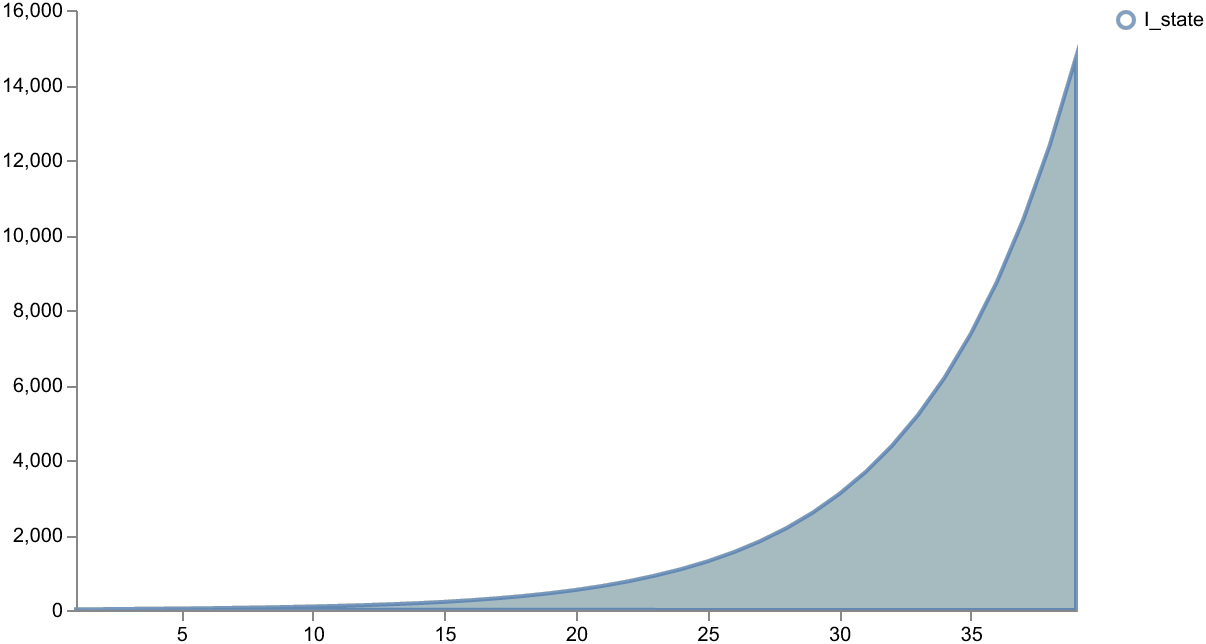

In [21]:
start_t = time.time()
sample_results2 = pyciemss.sample(
    model_opt2,
    end_time,
    logging_step_size,
    num_samples,
    start_time=start_time,
    solver_method="euler",
    solver_options={"step_size": 0.001}
)
print("Time taken: ", time.time()-start_t)
display(sample_results2["data"])
# Plot results for all states
schema = plots.trajectories(sample_results2["data"], keep="I_state")
plots.ipy_display(schema, dpi=150)

### RK4 with step size 0.001

Time taken:  2297.9934380054474


,timepoint_id,sample_id,timepoint_unknown,persistent_beta_c_param,persistent_kappa_param,persistent_gamma_param,persistent_hosp_param,persistent_death_hosp_param,persistent_I0_param,D_state,E_state,H_state,I_state,R_state,S_state,infected_observable_state,exposed_observable_state,hospitalized_observable_state,dead_observable_state
0,0,0,1.0,0.723076,0.166322,0.139140,0.140604,0.029436,6.682474,0.000511,32.748398,0.191793,14.224676,1.295300,19339994.0,14.224676,32.748398,0.191793,0.000511
1,1,0,2.0,0.723076,0.166322,0.139140,0.140604,0.029436,6.682474,0.002405,28.018883,0.459606,19.415684,3.387971,19339994.0,19.415684,28.018883,0.459606,0.002405
2,2,0,3.0,0.723076,0.166322,0.139140,0.140604,0.029436,6.682474,0.005977,24.971796,0.755650,23.042698,6.056824,19339994.0,23.042698,24.971796,0.755650,0.005977
3,3,0,4.0,0.723076,0.166322,0.139140,0.140604,0.029436,6.682474,0.011303,23.047628,1.052194,25.630295,9.150860,19339994.0,25.630295,23.047628,1.052194,0.011303
4,4,0,5.0,0.723076,0.166322,0.139140,0.140604,0.029436,6.682474,0.018337,21.873554,1.334130,27.528101,12.566563,19339994.0,27.528101,21.873554,1.334130,0.018337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,34,99,35.0,0.143644,0.672438,0.499425,0.185729,0.044689,14.936242,5.457522,247.146286,40.801174,111.675041,830.945068,19339986.0,111.675041,247.146286,40.801174,5.457522
3896,35,99,36.0,0.143644,0.672438,0.499425,0.185729,0.044689,14.936242,5.832200,260.819305,43.059807,117.853195,885.614563,19339986.0,117.853195,260.819305,43.059807,5.832200
3897,36,99,37.0,0.143644,0.672438,0.499425,0.185729,0.044689,14.936242,6.227618,275.248383,45.443130,124.373138,943.307983,19339986.0,124.373138,275.248383,45.443130,6.227618
3898,37,99,38.0,0.143644,0.672438,0.499425,0.185729,0.044689,14.936242,6.644922,290.475861,47.958084,131.253830,1004.193909,19339986.0,131.253830,290.475861,47.958084,6.644922


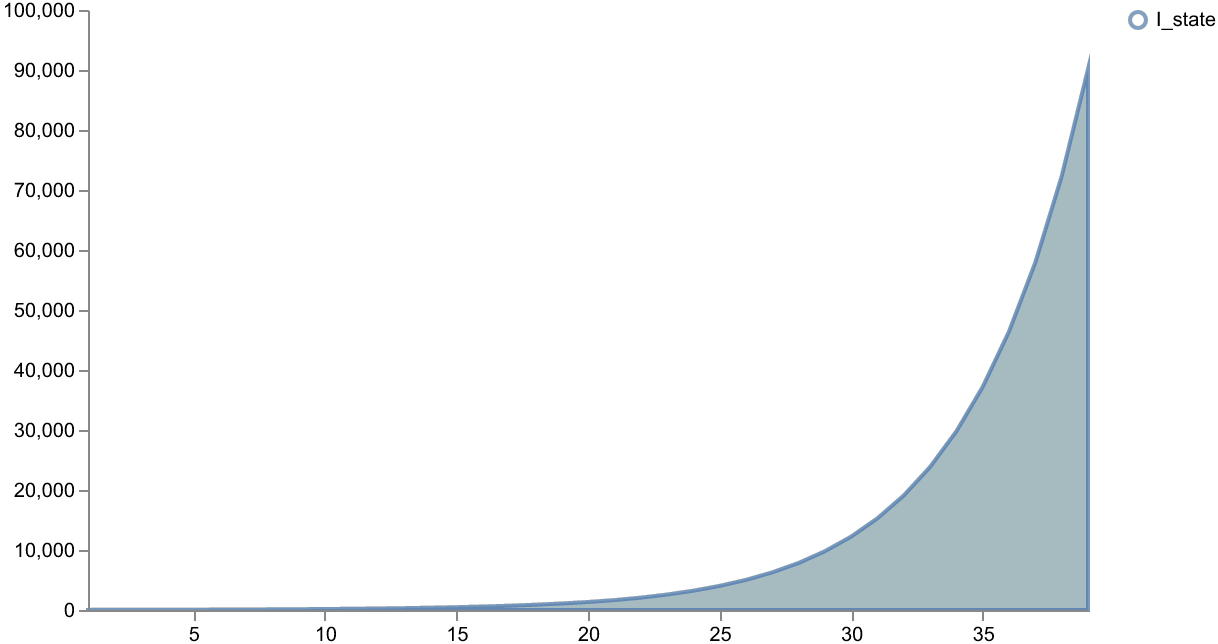

In [22]:
start_t = time.time()
sample_results2 = pyciemss.sample(
    model_opt2,
    end_time,
    logging_step_size,
    num_samples,
    start_time=start_time,
    solver_method="rk4",
    solver_options={"step_size": 0.001}
)
print("Time taken: ", time.time()-start_t)
display(sample_results2["data"])
# Plot results for all states
schema = plots.trajectories(sample_results2["data"], keep="I_state")
plots.ipy_display(schema, dpi=150)

### dopri5 (adaptive-step solver)

Time taken:  10.513278722763062


,timepoint_id,sample_id,timepoint_unknown,persistent_beta_c_param,persistent_kappa_param,persistent_gamma_param,persistent_hosp_param,persistent_death_hosp_param,persistent_I0_param,D_state,E_state,H_state,I_state,R_state,S_state,infected_observable_state,exposed_observable_state,hospitalized_observable_state,dead_observable_state
0,0,0,1.0,0.249310,0.477958,0.483950,0.167110,0.075883,6.405195,0.004808,35.061546,0.676154,11.288852,3.744379,19339992.0,11.288852,35.061546,0.676154,0.004808
1,1,0,2.0,0.249310,0.477958,0.483950,0.167110,0.075883,6.405195,0.021136,32.653839,1.479812,13.621075,9.021147,19339984.0,13.621075,32.653839,1.479812,0.021136
2,2,0,3.0,0.249310,0.477958,0.483950,0.167110,0.075883,6.405195,0.049575,31.463459,2.256846,14.726109,15.108250,19339978.0,14.726109,31.463459,2.256846,0.049575
3,3,0,4.0,0.249310,0.477958,0.483950,0.167110,0.075883,6.405195,0.089202,30.858656,2.949066,15.240900,21.643671,19339972.0,15.240900,30.858656,2.949066,0.089202
4,4,0,5.0,0.249310,0.477958,0.483950,0.167110,0.075883,6.405195,0.138581,30.535645,3.541533,15.471835,28.441254,19339964.0,15.471835,30.535645,3.541533,0.138581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,34,99,35.0,0.605071,0.570391,0.479842,0.022368,0.035817,12.944912,0.324997,99.809410,2.286047,48.961124,505.247772,19339384.0,48.961124,99.809410,2.286047,0.324997
3896,35,99,36.0,0.605071,0.570391,0.479842,0.022368,0.035817,12.944912,0.341619,102.827934,2.355357,50.441807,529.010254,19339354.0,50.441807,102.827934,2.355357,0.341619
3897,36,99,37.0,0.605071,0.570391,0.479842,0.022368,0.035817,12.944912,0.358746,105.937477,2.426732,51.967243,553.488831,19339290.0,51.967243,105.937477,2.426732,0.358746
3898,37,99,38.0,0.605071,0.570391,0.479842,0.022368,0.035817,12.944912,0.376393,109.141228,2.500237,53.538864,578.710449,19339296.0,53.538864,109.141228,2.500237,0.376393


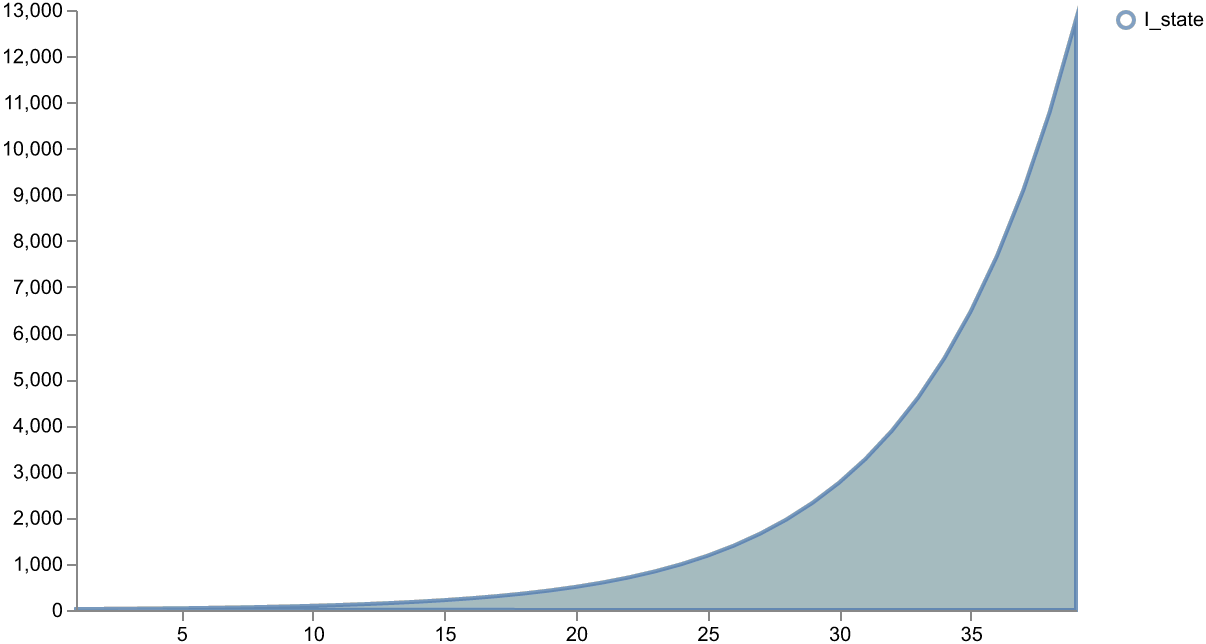

In [26]:
start_t = time.time()
sample_results2 = pyciemss.sample(
    model_opt2,
    end_time,
    logging_step_size,
    num_samples,
    start_time=start_time,
    solver_method="dopri5",
)
print("Time taken: ", time.time()-start_t)
display(sample_results2["data"])
# Plot results for all states
schema = plots.trajectories(sample_results2["data"], keep="I_state")
plots.ipy_display(schema, dpi=150)

### Explicit Adams-Bashforth solver with step size 0.01

Time taken:  70.83945083618164


,timepoint_id,sample_id,timepoint_unknown,persistent_beta_c_param,persistent_kappa_param,persistent_gamma_param,persistent_hosp_param,persistent_death_hosp_param,persistent_I0_param,D_state,E_state,H_state,I_state,R_state,S_state,infected_observable_state,exposed_observable_state,hospitalized_observable_state,dead_observable_state
0,0,0,1.0,0.581617,0.534763,0.258333,0.024879,0.065694,11.717782,0.000544,3.824250e+01,8.711272e-02,1.757807e+01,3.746526e+00,19339988.0,1.757807e+01,3.824250e+01,8.711272e-02,0.000544
1,1,0,2.0,0.581617,0.534763,0.258333,0.024879,0.065694,11.717782,-1.462089,6.564673e+03,6.927302e+01,-4.490719e+03,1.822015e+03,19336092.0,-4.490719e+03,6.564673e+03,6.927302e+01,-1.462089
2,2,0,3.0,0.581617,0.534763,0.258333,0.024879,0.065694,11.717782,-306368.500000,6.938084e+08,8.521088e+06,-1.844356e+08,1.468359e+08,-645083840.0,-1.844356e+08,6.938084e+08,8.521088e+06,-306368.500000
3,3,0,4.0,0.581617,0.534763,0.258333,0.024879,0.065694,11.717782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,5.0,0.581617,0.534763,0.258333,0.024879,0.065694,11.717782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,34,99,35.0,0.222555,0.649914,0.300944,0.197216,0.043322,5.687375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3896,35,99,36.0,0.222555,0.649914,0.300944,0.197216,0.043322,5.687375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3897,36,99,37.0,0.222555,0.649914,0.300944,0.197216,0.043322,5.687375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3898,37,99,38.0,0.222555,0.649914,0.300944,0.197216,0.043322,5.687375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


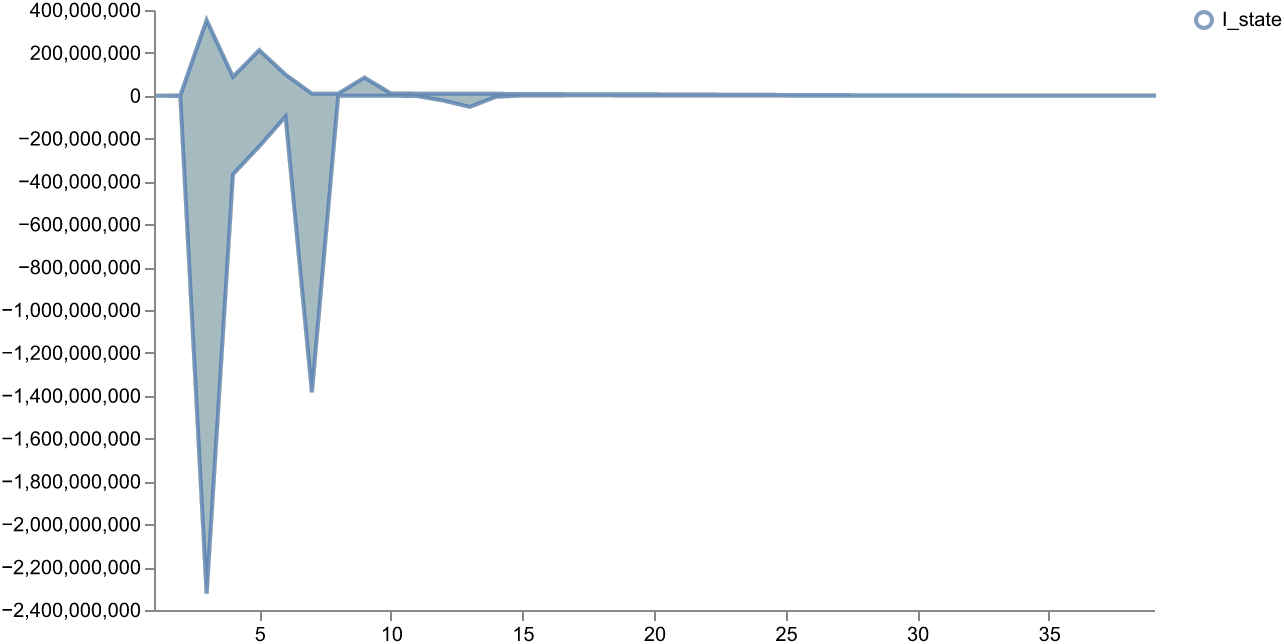

In [14]:
start_t = time.time()
sample_results2 = pyciemss.sample(
    model_opt2,
    end_time,
    logging_step_size,
    num_samples,
    start_time=start_time,
    solver_method="explicit_adams",
    solver_options={"step_size": 0.01},
)
print("Time taken: ", time.time()-start_t)
display(sample_results2["data"])
# Plot results for all states
schema = plots.trajectories(sample_results2["data"], keep="I_state")
plots.ipy_display(schema, dpi=150)

### Implicit Adams-Bashforth-Moulton solver with step size 0.01

c:\Users\Anirban\anaconda3\envs\askem\lib\site-packages\torchdiffeq\_impl\fixed_adams.py:220: UserWarning: Functional iteration did not converge. Solution may be incorrect.
  warnings.warn('Functional iteration did not converge. Solution may be incorrect.')
  0%|          | 0/20 [12:02<?, ?it/s]


Time taken:  253.39267230033875


,timepoint_id,sample_id,timepoint_unknown,persistent_beta_c_param,persistent_kappa_param,persistent_gamma_param,persistent_hosp_param,persistent_death_hosp_param,persistent_I0_param,D_state,E_state,H_state,I_state,R_state,S_state,infected_observable_state,exposed_observable_state,hospitalized_observable_state,dead_observable_state
0,0,0,1.0,0.573915,0.686921,0.321689,0.183427,0.069593,10.766541,0.004915,39.520176,0.735125,16.233665,3.652683,19339990.0,16.233665,39.520176,0.735125,0.004915
1,1,0,2.0,0.573915,0.686921,0.321689,0.183427,0.069593,10.766541,0.021006,42.018574,1.589987,20.457788,8.702799,19339990.0,20.457788,42.018574,1.589987,0.021006
2,2,0,3.0,0.573915,0.686921,0.321689,0.183427,0.069593,10.766541,0.049434,46.373486,2.501962,24.276134,14.961227,19339990.0,24.276134,46.373486,2.501962,0.049434
3,3,0,4.0,0.573915,0.686921,0.321689,0.183427,0.069593,10.766541,0.090830,52.081654,3.452454,28.132975,22.394011,19339990.0,28.132975,52.081654,3.452454,0.090830
4,4,0,5.0,0.573915,0.686921,0.321689,0.183427,0.069593,10.766541,0.145731,58.953842,4.444112,32.281792,31.054537,19339990.0,32.281792,58.953842,4.444112,0.145731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,34,99,35.0,0.562373,0.759235,0.142778,0.173899,0.037773,9.900641,143.552383,125183.429688,4598.003418,81689.890625,43553.437500,19085106.0,81689.890625,125183.429688,4598.003418,143.552383
3896,35,99,36.0,0.562373,0.759235,0.142778,0.173899,0.037773,9.900641,182.831131,158891.468750,5850.652344,103851.828125,55444.597656,19016054.0,103851.828125,158891.468750,5850.652344,182.831131
3897,36,99,37.0,0.562373,0.759235,0.142778,0.173899,0.037773,9.900641,232.799438,201450.312500,7441.239746,131935.250000,70557.851562,18928658.0,131935.250000,201450.312500,7441.239746,232.799438
3898,37,99,38.0,0.562373,0.759235,0.142778,0.173899,0.037773,9.900641,296.334381,255046.343750,9458.898438,167466.640625,89751.671875,18818260.0,167466.640625,255046.343750,9458.898438,296.334381


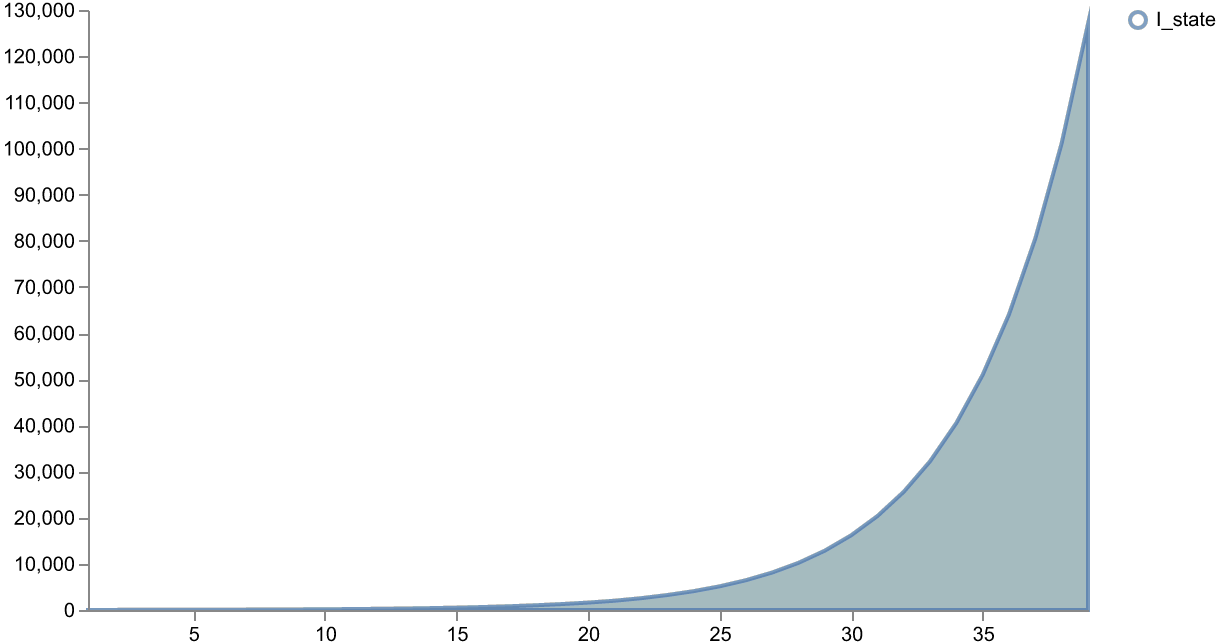

In [15]:
start_t = time.time()
sample_results2 = pyciemss.sample(
    model_opt2,
    end_time,
    logging_step_size,
    num_samples,
    start_time=start_time,
    solver_method="implicit_adams",
    solver_options={"step_size": 0.01},
)
print("Time taken: ", time.time()-start_t)
display(sample_results2["data"])
# Plot results for all states
schema = plots.trajectories(sample_results2["data"], keep="I_state")
plots.ipy_display(schema, dpi=150)

### Scipy solve_ivp with RK45 (adaptive-step)

Time taken:  7.069075345993042


,timepoint_id,sample_id,timepoint_unknown,persistent_beta_c_param,persistent_kappa_param,persistent_gamma_param,persistent_hosp_param,persistent_death_hosp_param,persistent_I0_param,D_state,E_state,H_state,I_state,R_state,S_state,infected_observable_state,exposed_observable_state,hospitalized_observable_state,dead_observable_state
0,0,0,1.0,0.178966,0.446125,0.428899,0.123665,0.077450,8.973458,0.004135,35.713345,0.554620,13.457577,4.357788,19339986.0,13.457577,35.713345,0.554620,0.004135
1,1,0,2.0,0.178966,0.446125,0.428899,0.123665,0.077450,8.973458,0.017450,33.650944,1.164536,15.773893,10.056754,19339980.0,15.773893,33.650944,1.164536,0.017450
2,2,0,3.0,0.178966,0.446125,0.428899,0.123665,0.077450,8.973458,0.040052,32.710175,1.745151,16.997999,16.508421,19339972.0,16.997999,32.710175,1.745151,0.040052
3,3,0,4.0,0.178966,0.446125,0.428899,0.123665,0.077450,8.973458,0.071193,32.335331,2.264204,17.671991,23.406769,19339966.0,17.671991,32.335331,2.264204,0.071193
4,4,0,5.0,0.178966,0.446125,0.428899,0.123665,0.077450,8.973458,0.109837,32.246334,2.713938,18.069086,30.589880,19339958.0,18.069086,32.246334,2.713938,0.109837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,34,99,35.0,0.619397,0.301316,0.232630,0.163813,0.011295,5.544913,0.463443,71.834862,11.027617,67.536530,306.302826,19339582.0,67.536530,71.834862,11.027617,0.463443
3896,35,99,36.0,0.619397,0.301316,0.232630,0.163813,0.011295,5.544913,0.488774,74.265770,11.401850,69.822021,321.878693,19339562.0,69.822021,74.265770,11.401850,0.488774
3897,36,99,37.0,0.619397,0.301316,0.232630,0.163813,0.011295,5.544913,0.514965,76.778931,11.788554,72.184837,337.981812,19339540.0,72.184837,76.778931,11.788554,0.514965
3898,37,99,38.0,0.619397,0.301316,0.232630,0.163813,0.011295,5.544913,0.542044,79.377121,12.188190,74.627609,354.630035,19339518.0,74.627609,79.377121,12.188190,0.542044


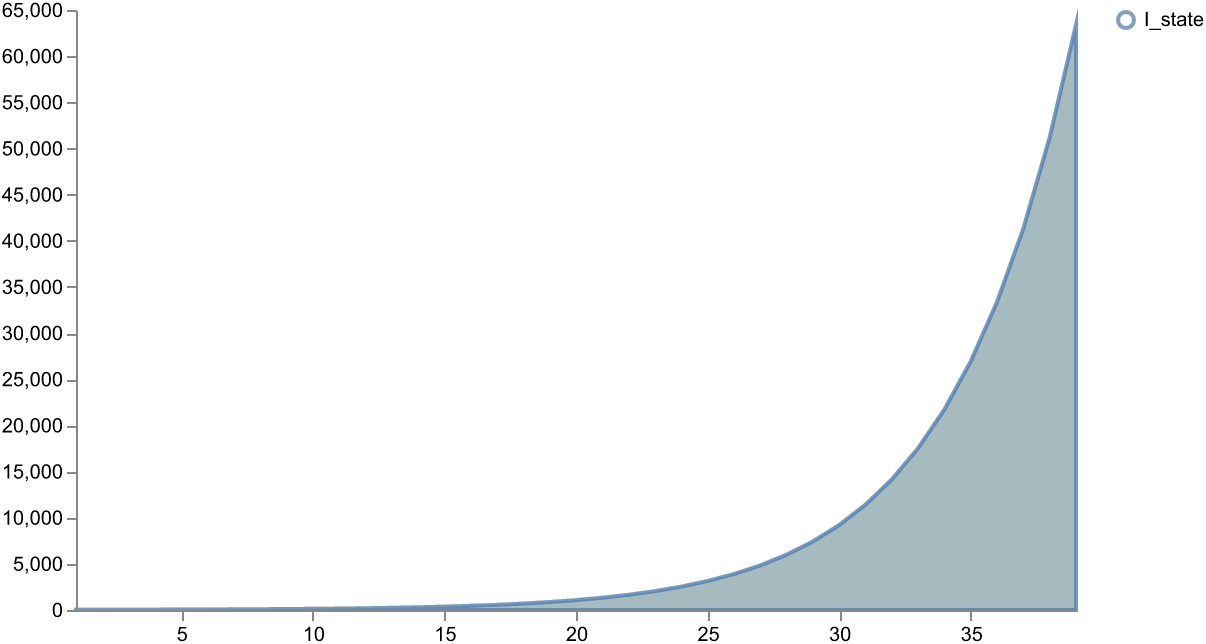

In [24]:
start_t = time.time()
sample_results2 = pyciemss.sample(
    model_opt2,
    end_time,
    logging_step_size,
    num_samples,
    start_time=start_time,
    solver_method="scipy_solver",
    solver_options={"solver": "RK45"}
)
print("Time taken: ", time.time()-start_t)
display(sample_results2["data"])
# Plot results for all states
schema = plots.trajectories(sample_results2["data"], keep="I_state")
plots.ipy_display(schema, dpi=150)

### Scipy solve_ivp with LSODA (automatic switching between solvers for stiff and nonstiff ODEs)

Time taken:  8.768273115158081


,timepoint_id,sample_id,timepoint_unknown,persistent_beta_c_param,persistent_kappa_param,persistent_gamma_param,persistent_hosp_param,persistent_death_hosp_param,persistent_I0_param,D_state,E_state,H_state,I_state,R_state,S_state,infected_observable_state,exposed_observable_state,hospitalized_observable_state,dead_observable_state
0,0,0,1.0,0.755250,0.422060,0.221151,0.018493,0.078461,5.807797,0.000255,34.797192,0.036073,12.942037,2.089700,19339990.0,12.942037,34.797192,0.036073,0.000255
1,1,0,2.0,0.755250,0.422060,0.221151,0.018493,0.078461,5.807797,0.001211,32.948730,0.087511,17.916363,5.478109,19339984.0,17.916363,32.948730,0.087511,0.001211
2,2,0,3.0,0.755250,0.422060,0.221151,0.018493,0.078461,5.807797,0.003035,33.119984,0.145632,21.742359,9.818153,19339974.0,21.742359,33.119984,0.145632,0.003035
3,3,0,4.0,0.755250,0.422060,0.221151,0.018493,0.078461,5.807797,0.005794,34.558998,0.206186,25.005356,14.930602,19339966.0,25.005356,34.558998,0.206186,0.005794
4,4,0,5.0,0.755250,0.422060,0.221151,0.018493,0.078461,5.807797,0.009509,36.847328,0.267357,28.048122,20.733955,19339954.0,28.048122,36.847328,0.267357,0.009509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,34,99,35.0,0.667837,0.572193,0.266941,0.165917,0.018354,9.517492,4.893877,1832.474365,164.049133,1184.577271,2426.855225,19334426.0,1184.577271,1832.474365,164.049133,4.893877
3896,35,99,36.0,0.667837,0.572193,0.266941,0.165917,0.018354,9.517492,5.533627,2065.645752,184.929794,1335.328613,2741.266846,19333706.0,1335.328613,2065.645752,184.929794,5.533627
3897,36,99,37.0,0.667837,0.572193,0.266941,0.165917,0.018354,9.517492,6.254805,2328.467285,208.466949,1505.255249,3095.690674,19332896.0,1505.255249,2328.467285,208.466949,6.254805
3898,37,99,38.0,0.667837,0.572193,0.266941,0.165917,0.018354,9.517492,7.067770,2624.704102,234.998398,1696.793701,3495.216553,19331980.0,1696.793701,2624.704102,234.998398,7.067770


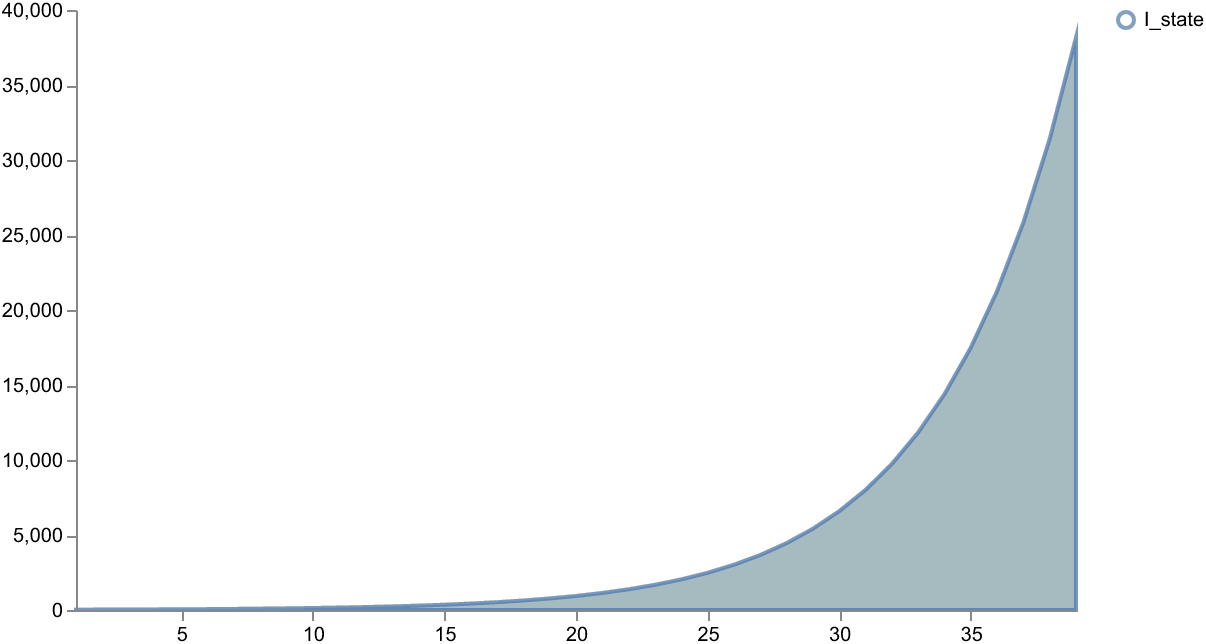

In [25]:
start_t = time.time()
sample_results2 = pyciemss.sample(
    model_opt2,
    end_time,
    logging_step_size,
    num_samples,
    start_time=start_time,
    solver_method="scipy_solver",
    solver_options={"solver": "LSODA"}
)
print("Time taken: ", time.time()-start_t)
display(sample_results2["data"])
# Plot results for all states
schema = plots.trajectories(sample_results2["data"], keep="I_state")
plots.ipy_display(schema, dpi=150)